<h1 style="color:blue">Data Preprocessing</h1>

## Importing Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Information

In [18]:
df = pd.read_csv("Data.csv")

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [22]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [24]:
df.shape

(545, 13)

In [26]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [27]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [29]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


## One Hot Encoding

In [35]:
dummies = pd.get_dummies(df)

In [37]:
temp_dummies = dummies[["mainroad_yes", "guestroom_yes", "basement_yes", "hotwaterheating_yes", "airconditioning_yes", "prefarea_yes"]]

In [38]:
temp_dummies

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [39]:
df2 = df.copy()

In [40]:
df2["mainroad"] = temp_dummies["mainroad_yes"]
df2["guestroom"] = temp_dummies["guestroom_yes"]
df2["basement"] = temp_dummies["basement_yes"]
df2["hotwaterheating"] = temp_dummies["hotwaterheating_yes"]
df2["airconditioning"] = temp_dummies["airconditioning_yes"]
df2["prefarea"] = temp_dummies["prefarea_yes"]

In [43]:
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [52]:
df3 = df2.copy()

In [57]:
listt = df3["furnishingstatus"].unique()
mapping = {}
for idx, ls in enumerate(listt):
    mapping[ls] = idx
mapping

{'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2}

In [59]:
df3["furnishingstatus"] = df3["furnishingstatus"].apply(lambda x: mapping[x])
df3.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


<pre>
<b>Some Information About The Proccessed data:</b>
    Columns = {price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus}
    Price: Int
    Area: Int
    Bedrooms: Int
    Bathrooms: Int
    Stories: Int
    Mainroad: {1: yes, 0: No} Object
    Guestroom: {1: yes, 0: No} Object
    Basement: {1: yes, 0: No} Object
    Hotwaterheating: {1: yes, 0: No} Object
    Airconditioning: {1: yes, 0: No} Object
    parking: Int
    Prefarea: {1: yes, 0: No} Object
    furnishingstatus: {furnished: 0, semi-furnished: 1, unfurnished: 2} Object
</pre>

(530, 13)

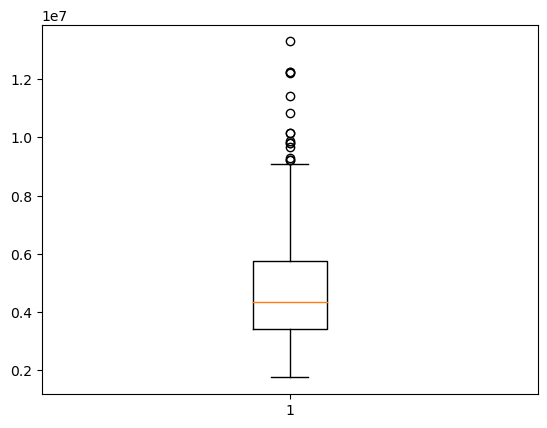

In [85]:
# outlier treatment for price
plt.boxplot(df3.price)
Q1 = df3.price.quantile(0.25)
Q3 = df3.price.quantile(0.75)
IQR = Q3 - Q1
df4 = df3[(df3.price >= Q1 - 1.5*IQR) & (df3.price <= Q3 + 1.5*IQR)]
df4.shape

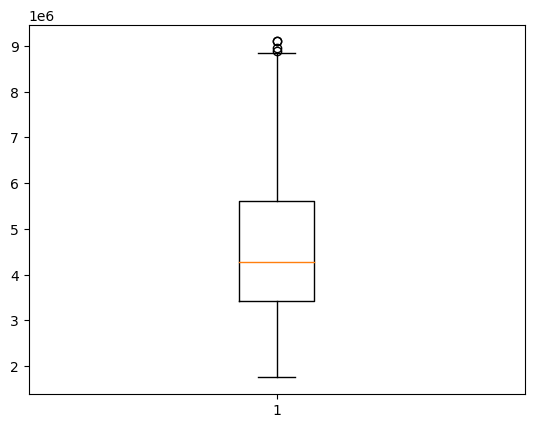

In [86]:
plt.boxplot(df4.price)
plt.show()

(517, 13)

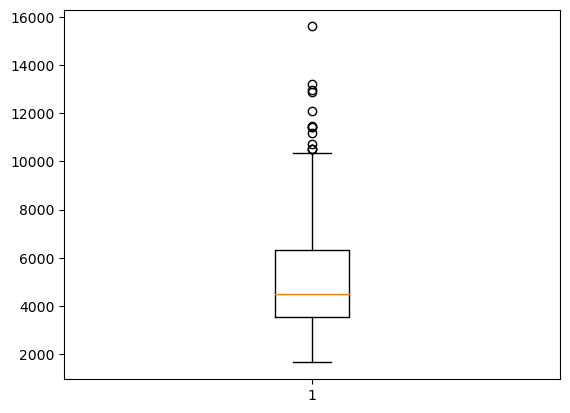

In [87]:
# outlier treatment for price
plt.boxplot(df4.area)
Q1 = df4.area.quantile(0.25)
Q3 = df4.area.quantile(0.75)
IQR = Q3 - Q1
df4 = df4[(df4.area >= Q1 - 1.5*IQR) & (df4.area <= Q3 + 1.5*IQR)]
df4.shape

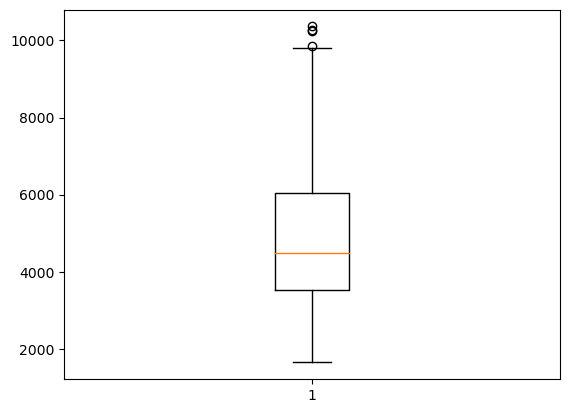

In [88]:
plt.boxplot(df4.area)
plt.show()

## Visualization

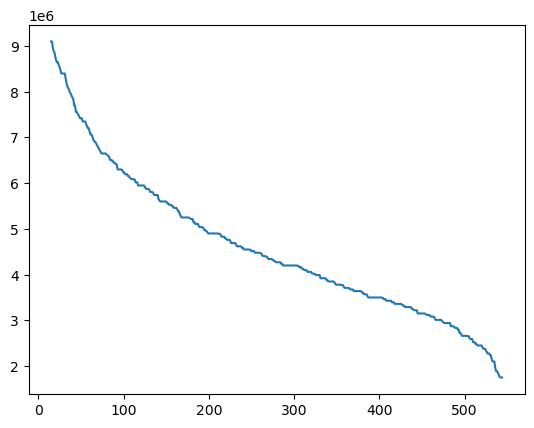

In [93]:
# Price
plt.plot(df4["price"])

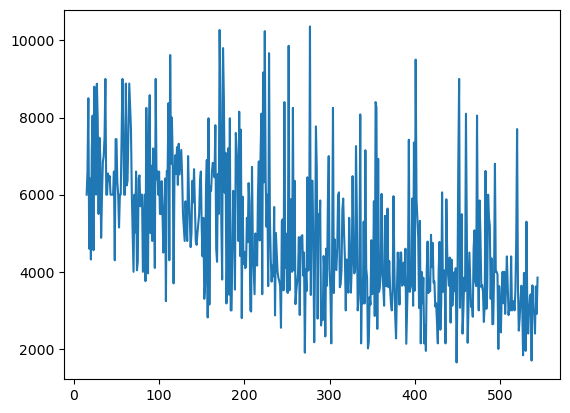

In [94]:
# Area
plt.plot(df4["area"])

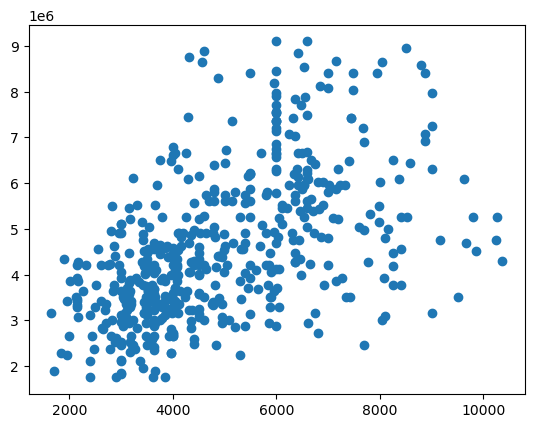

In [95]:
# Realtion Of Price And Area
plt.scatter(df4["area"], df4["price"])

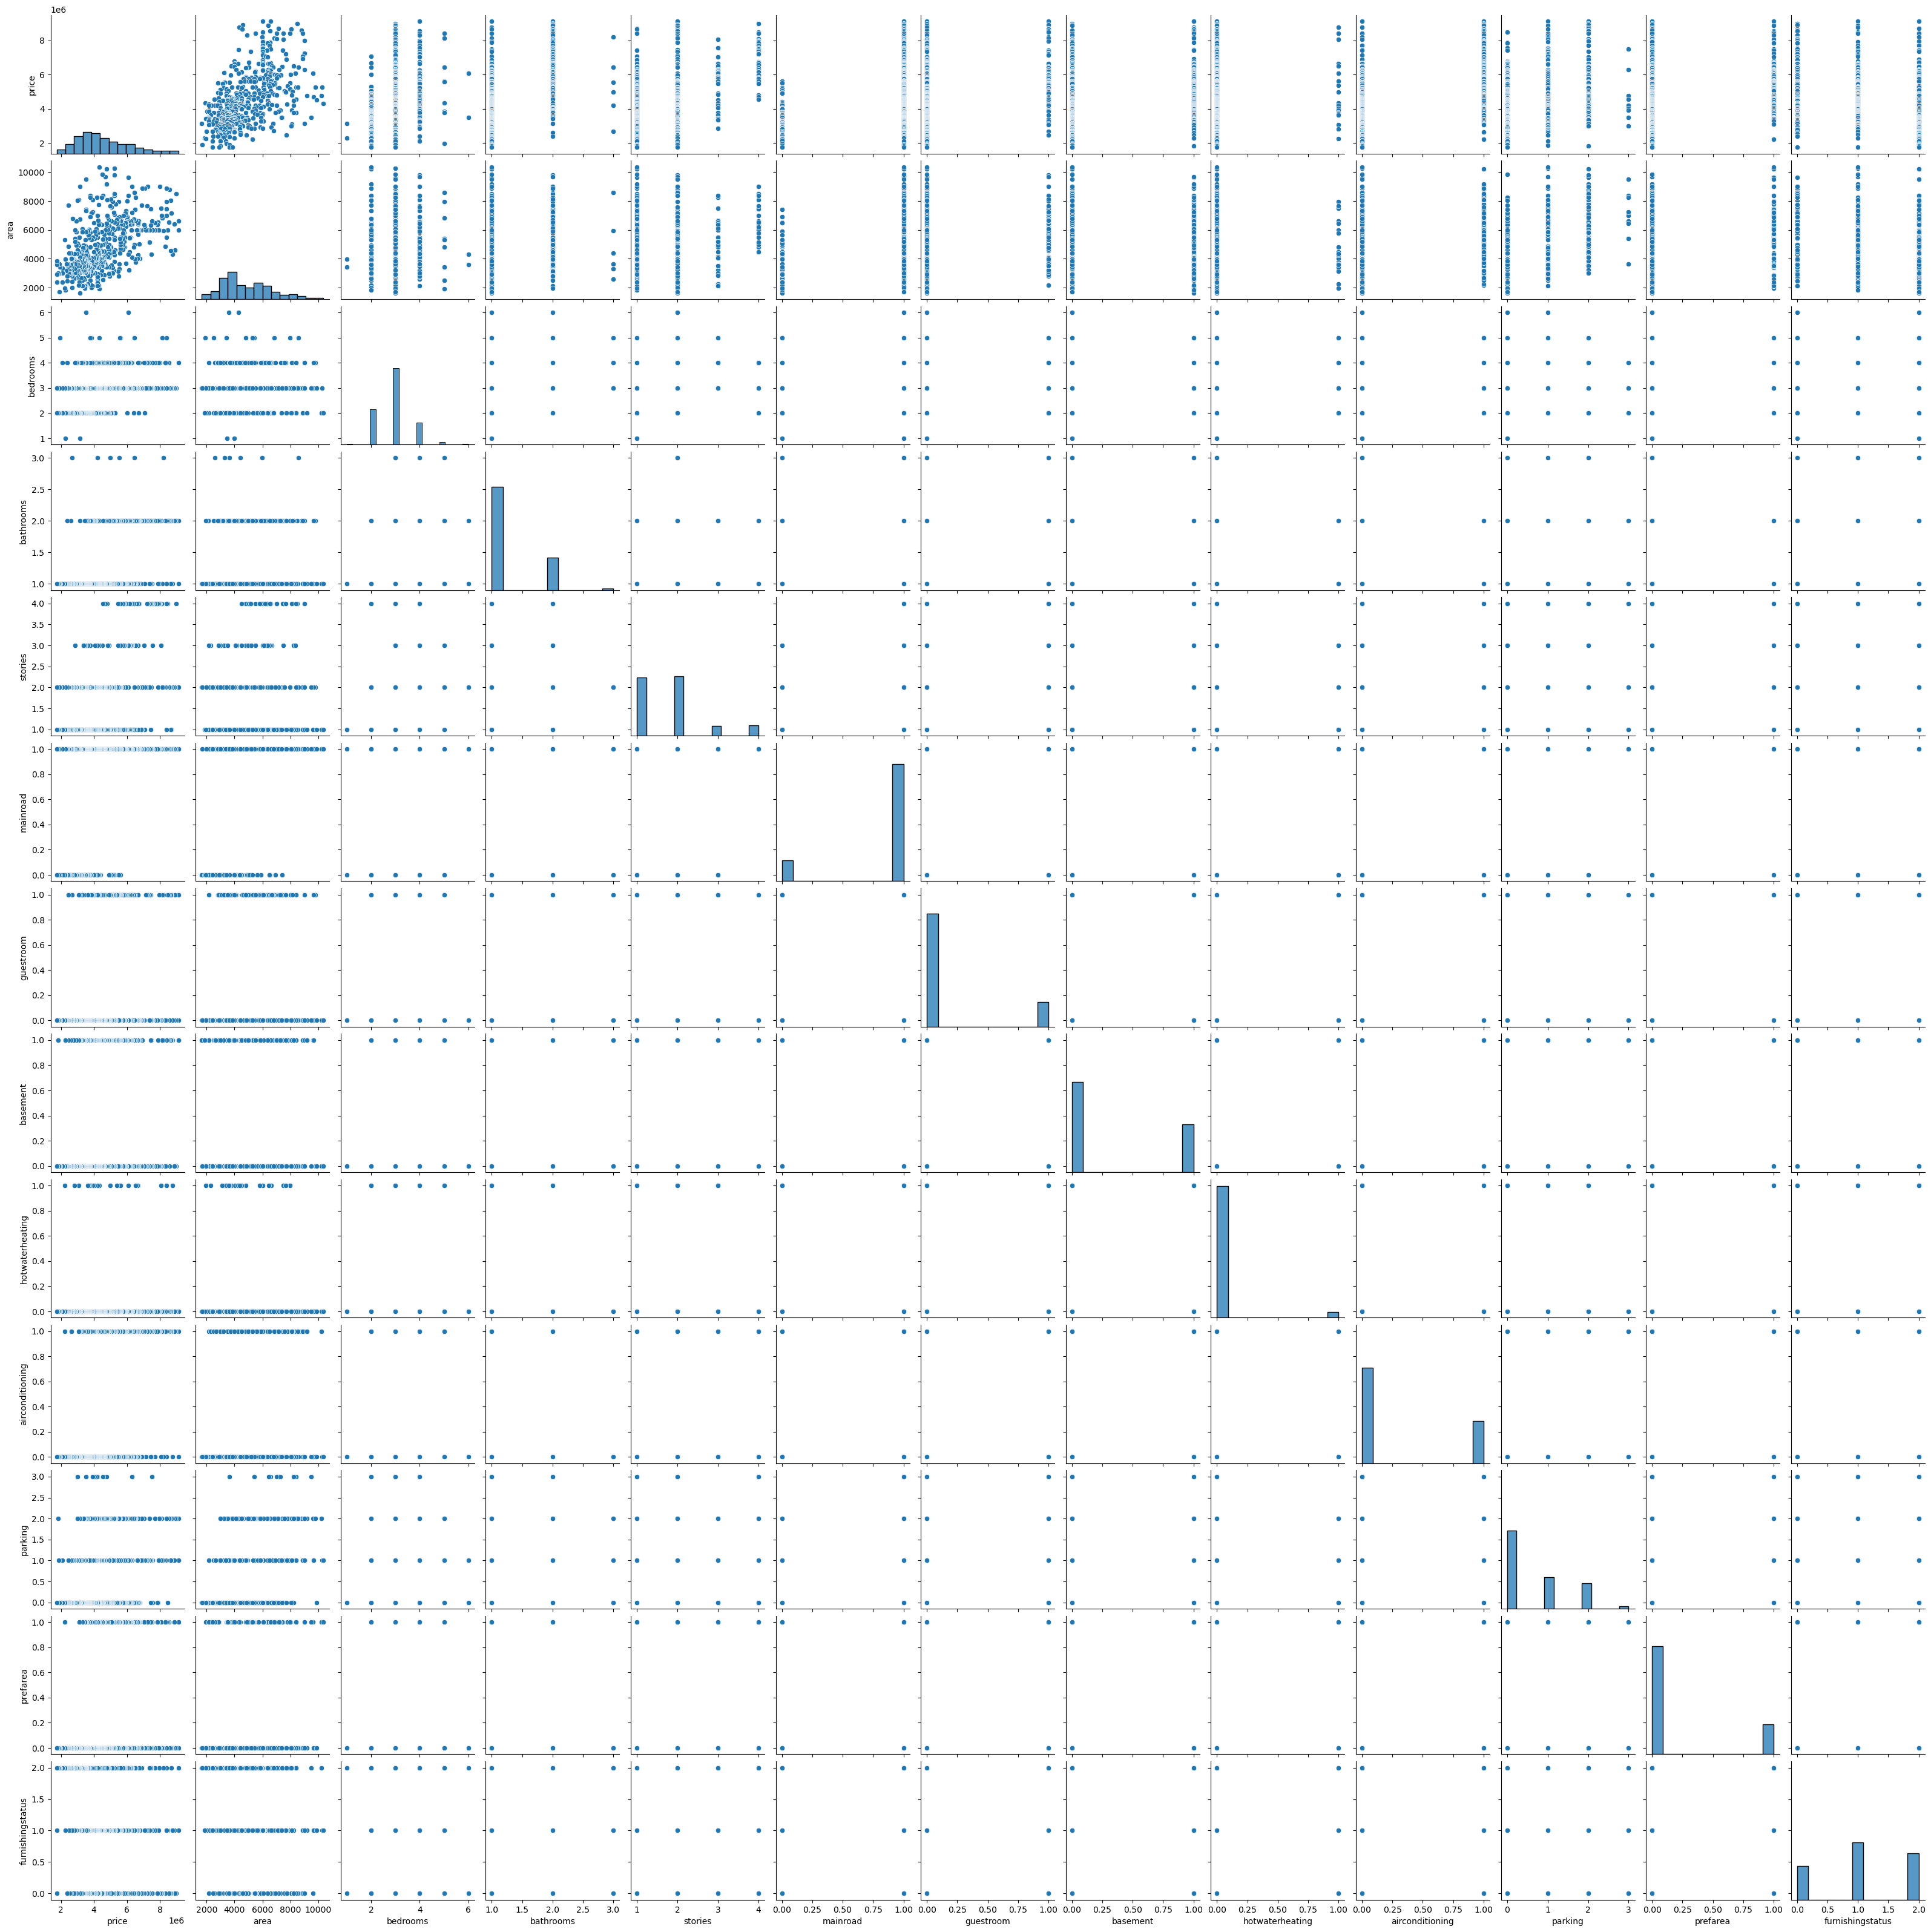

In [92]:
sns.pairplot(df4)

## Saving The Proccessed Data

In [96]:
df4.to_csv("processed_housing.csv", index=False)